In [ ]:
!pip install pandas-dataReader
!pip install yfinance
!pip install finance-datareader

In [7]:
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

import yfinance as yf
import pandas_datareader as pdr
import FinanceDataReader as fdr

In [11]:
end = datetime.today()
start = datetime(2018,1,1)

kospi = yf.download('^KS11',start,end) 
ss = yf.download('005930.KS',start,end) 
hm = yf.download('005380.KS',start,end) 

snp = yf.download('^GSPC',start,end) 
nikkei = yf.download('^N225',start,end) 
euronext = yf.download('^N100',start,end) 
vix = yf.download('^VIX',start,end) # VIX

ss_fdr = fdr.DataReader('005930', start, end)
hm_fdr = fdr.DataReader('005380', start, end) 
snp_fdr = fdr.DataReader('US500', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# FinanceDataReader

ss_fdr.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [14]:
# Pandas_datareader

ss.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,43740.902344,8474250
2018-01-03,52540.0,52560.0,51420.0,51620.0,44255.296875,10013500
2018-01-04,52120.0,52180.0,50640.0,51080.0,43792.339844,11695450
2018-01-05,51300.0,52120.0,51200.0,52120.0,44683.964844,9481150
2018-01-08,52400.0,52520.0,51500.0,52020.0,44598.234375,8383650


In [15]:
ss.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-19,67800.0,68400.0,67500.0,68400.0,68400.0,20349345
2023-05-22,68400.0,69000.0,68000.0,68500.0,68500.0,14470308
2023-05-23,68500.0,68700.0,68100.0,68400.0,68400.0,8561643
2023-05-24,68100.0,68700.0,68000.0,68500.0,68500.0,8192896
2023-05-25,69900.0,70000.0,68700.0,68800.0,68800.0,14231160


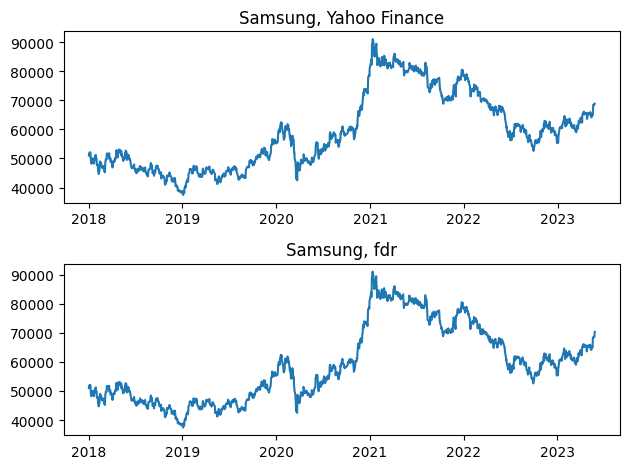

In [16]:
plt.subplot(211)
plt.plot(ss['Close'])
plt.title('Samsung, Yahoo Finance')

plt.subplot(212)
plt.plot(ss_fdr['Close'])
plt.title('Samsung, fdr')

plt.tight_layout()
plt.show()

In [18]:
df = pd.DataFrame({
    'c_ss_y': ss['Close'],
    'c_ss_f': ss_fdr['Close']
}).dropna()

df['result'] = df['c_ss_y'] != df['c_ss_f']

print(df.loc[df['result'] == 'True', :])

Empty DataFrame
Columns: [c_ss_y, c_ss_f, result]
Index: []


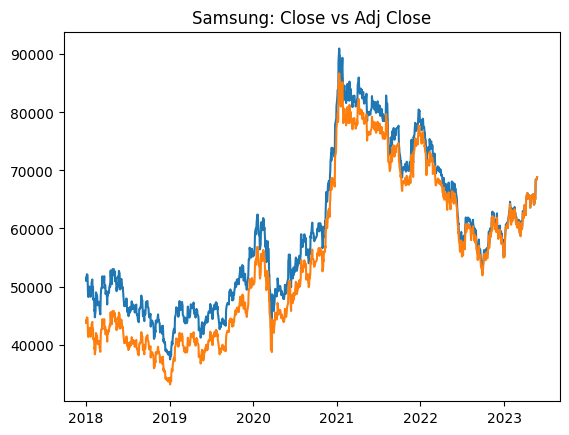

In [19]:
plt.title("Samsung: Close vs Adj Close")
plt.plot(ss['Close'])
plt.plot(ss['Adj Close'])
plt.show()

In [21]:
# Adjusted Close Price

st = pd.DataFrame({
    'SP500': snp['Adj Close'],
    'KOSPI': kospi['Adj Close'],
    'ss': ss['Adj Close'],
    'hm': hm['Adj Close'],
    'nikkei': nikkei['Adj Close'],
    'euronext': euronext['Adj Close'],
    'VIX': vix['Adj Close']
}).dropna()

st.head()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
Date,,,,,,,
2018-01-04,2723.989990,2466.459961,43792.339844,126324.914062,23506.330078,1051.579956,9.22
2018-01-05,2743.149902,2497.520020,44683.964844,128480.625000,23714.529297,1061.689941,9.22
2018-01-09,2751.290039,2510.229980,43209.359375,131498.593750,23849.990234,1070.790039,10.08
2018-01-10,2748.229980,2499.750000,41871.933594,134085.437500,23788.199219,1066.640015,9.82
2018-01-11,2767.560059,2487.909912,41357.531250,133654.312500,23710.429688,1062.709961,9.88


In [22]:
# Calculating Return

rt = (np.log(st) - np.log(st.shift(1)))*100
rt.columns = ['r_sp', 'r_kp', 'r_ss', 'r_hm', 'r_nk', 'r_ux', 'r_vx']
rt.head()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.700915,1.251434,2.015580,1.692084,0.881816,0.956817,0.000000
2018-01-09,0.296305,0.507613,-3.355758,2.321804,0.569590,0.853481,8.917819
2018-01-10,-0.111285,-0.418365,-3.144136,1.948103,-0.259418,-0.388320,-2.613216
2018-01-11,0.700903,-0.474776,-1.236122,-0.322048,-0.327460,-0.369132,0.609143


In [24]:
df = pd.merge(st, rt, left_index=True, right_index=True, how='inner')
df.head()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
Date,,,,,,,,,,,,,,
2018-01-04,2723.989990,2466.459961,43792.339844,126324.914062,23506.330078,1051.579956,9.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,2743.149902,2497.520020,44683.964844,128480.625000,23714.529297,1061.689941,9.22,0.700915,1.251434,2.015580,1.692084,0.881816,0.956817,0.000000
2018-01-09,2751.290039,2510.229980,43209.359375,131498.593750,23849.990234,1070.790039,10.08,0.296305,0.507613,-3.355758,2.321804,0.569590,0.853481,8.917819
2018-01-10,2748.229980,2499.750000,41871.933594,134085.437500,23788.199219,1066.640015,9.82,-0.111285,-0.418365,-3.144136,1.948103,-0.259418,-0.388320,-2.613216
2018-01-11,2767.560059,2487.909912,41357.531250,133654.312500,23710.429688,1062.709961,9.88,0.700903,-0.474776,-1.236122,-0.322048,-0.327460,-0.369132,0.609143


In [26]:
r1_ksp = st['KOSPI'].pct_change()*100

r2_ksp = (np.log(st.KOSPI) - np.log(st.KOSPI.shift(1)))*100

r_eg = pd.concat([r1_ksp, r2_ksp], axis=1)
r_eg.columns = ['r1_ksp', 'r2_ksp']
r_eg.head()

,r1_ksp,r2_ksp
Date,,
2018-01-04,NaN,NaN
2018-01-05,1.259297,1.251434
2018-01-09,0.508903,0.507613
2018-01-10,-0.417491,-0.418365
2018-01-11,-0.473651,-0.474776


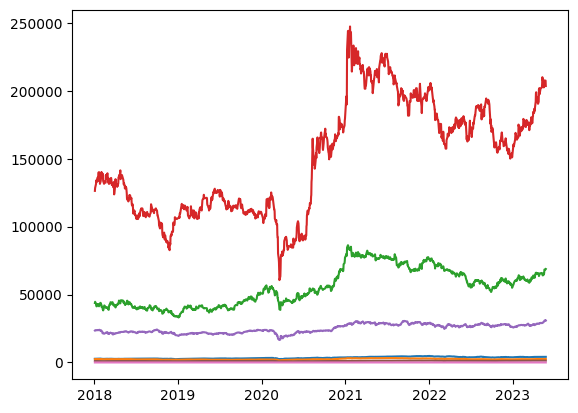

In [27]:
plt.plot(st)

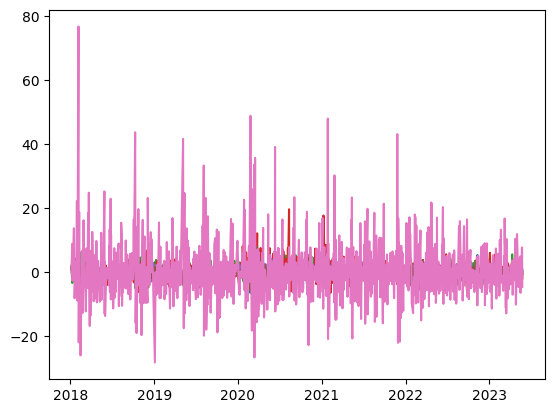

In [28]:
plt.plot(rt)

<Axes: xlabel='Date'>

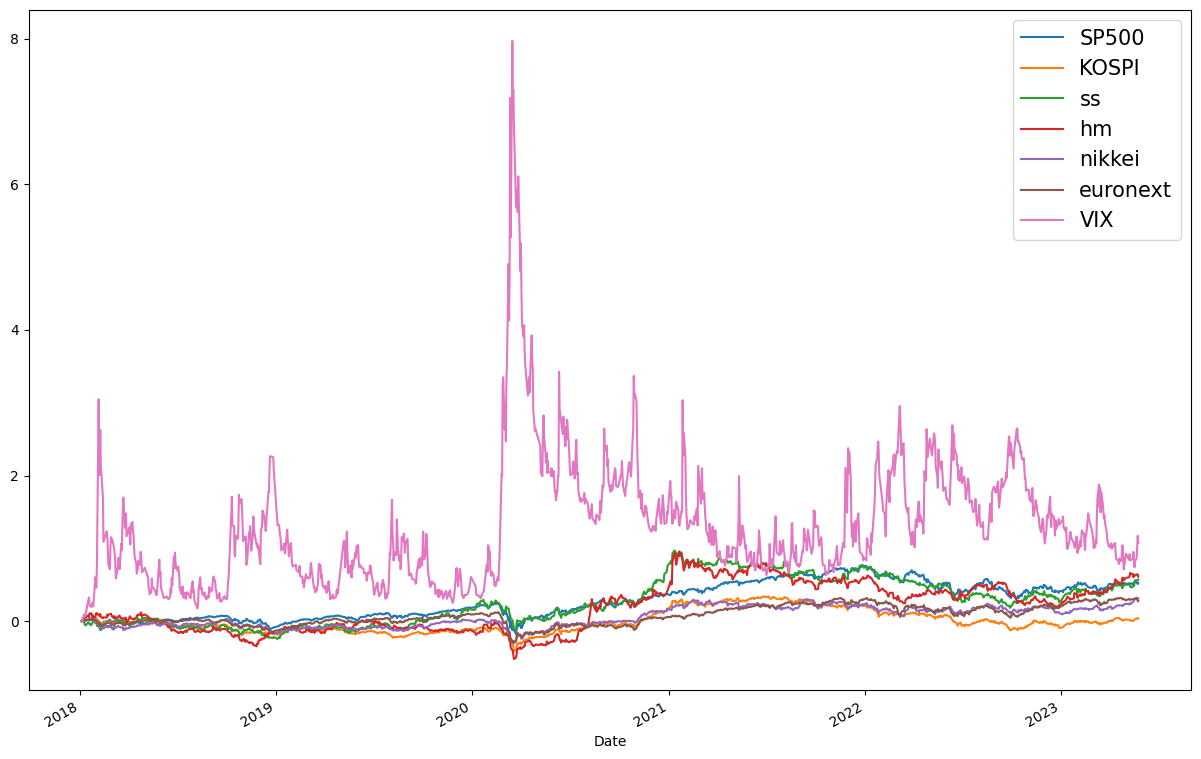

In [31]:
# Relative Stock Price

st_0 = st / st.iloc[0] - 1.0

plt.rcParams['legend.fontsize'] = 15
st_0.plot(figsize= (15,10), fontsize=10)

<Axes: xlabel='Date'>

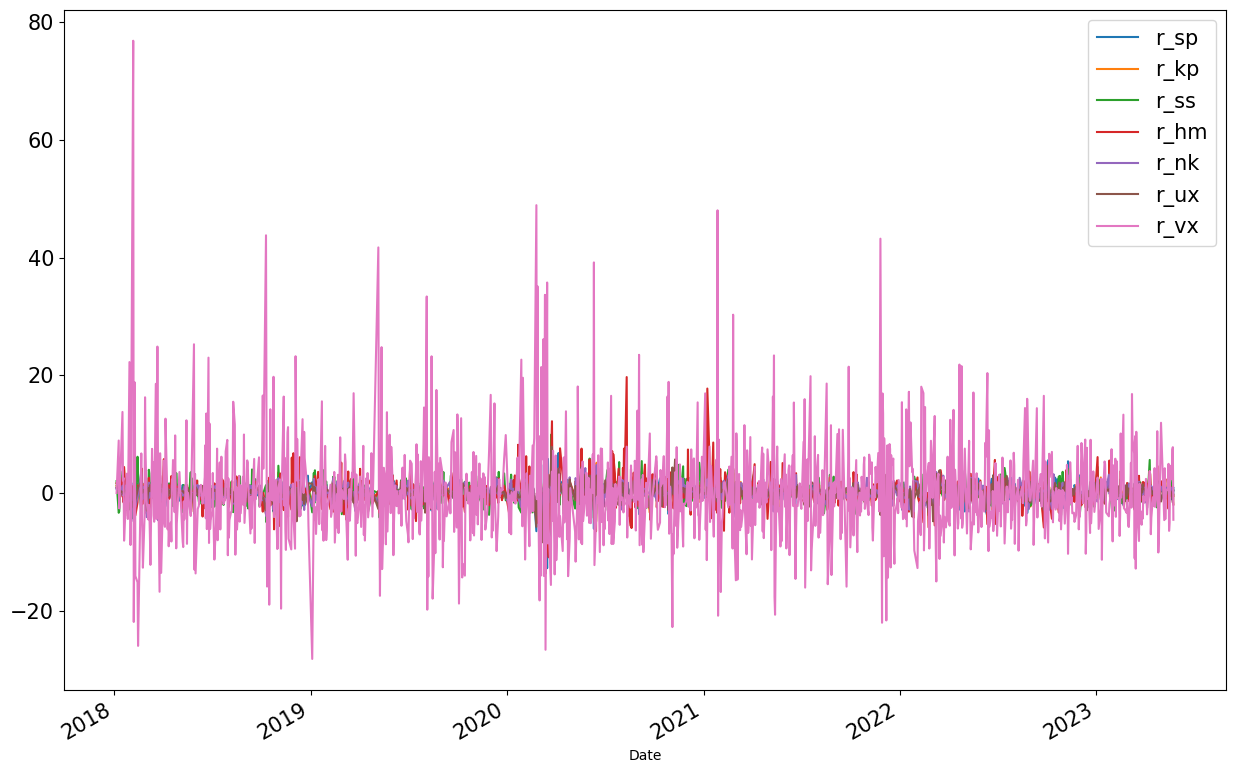

In [32]:
# Return graph

rt.plot(figsize=(15,10), fontsize=15)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

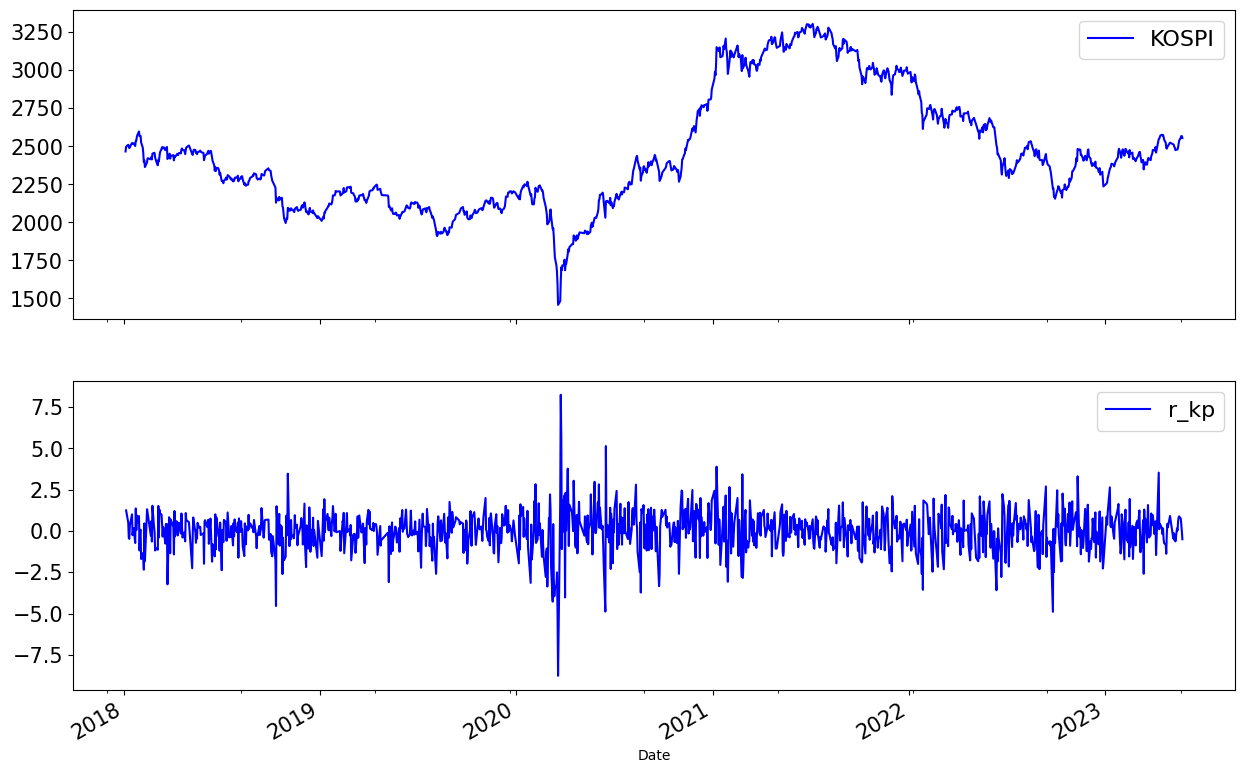

In [33]:
plt.rcParams['legend.fontsize'] =16
df[['KOSPI', 'r_kp']].plot(subplots=True, style='b', figsize=(15,10), fontsize=15)

Text(0.5, 1.0, "['KOSPI return']")

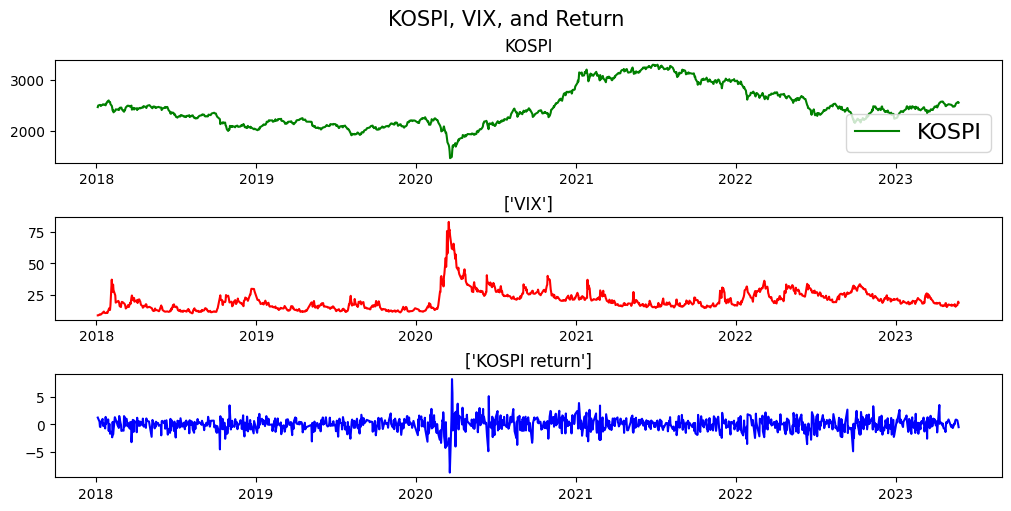

In [38]:
# Correlation

fig, axs = plt.subplots(3, 1, figsize=(10,5), constrained_layout=True)
fig.suptitle('KOSPI, VIX, and Return', fontsize=15)

axs[0].plot(df.index, df['KOSPI'], 'g-', label= 'KOSPI')

axs[0].set_title('KOSPI')
axs[0].legend(['KOSPI'])

axs[1].plot(df.index, df['VIX'], 'r-')
axs[1].set_title(['VIX'])

axs[2].plot(df.index, df['r_kp'], 'b-')
axs[2].set_title(['KOSPI return'])

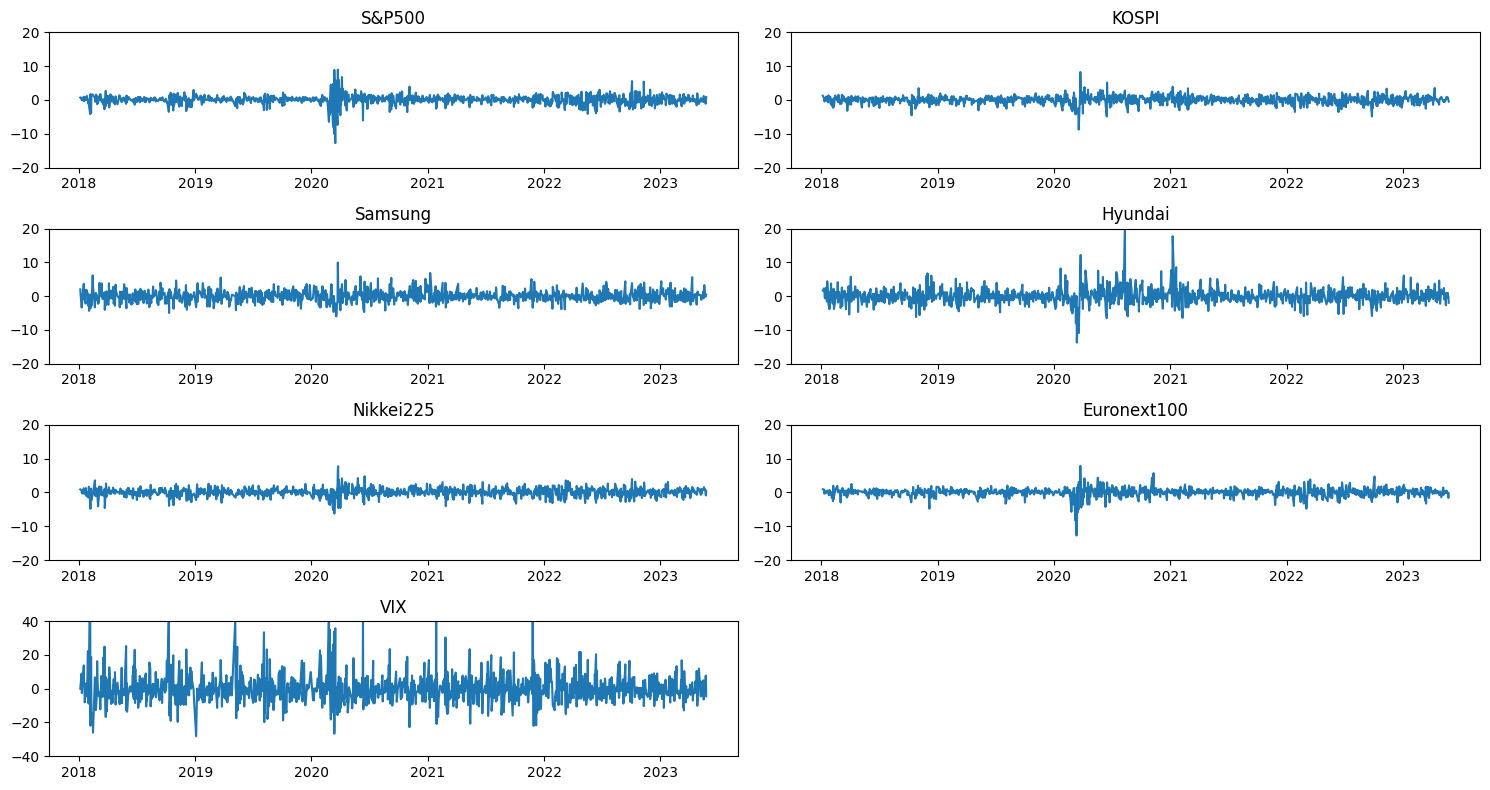

In [43]:
# Returns

fig = plt.figure(figsize=(15,8))

plt.subplot(421)
plt.plot(df['r_sp'])
plt.ylim([-20,20])
plt.gca().title.set_text('S&P500')

plt.subplot(422)
plt.plot(df['r_kp'])
plt.ylim([-20,20])
plt.gca().title.set_text('KOSPI')

plt.subplot(423)
plt.plot(df['r_ss'])
plt.ylim([-20,20])
plt.gca().title.set_text('Samsung')

plt.subplot(424)
plt.plot(df['r_hm'])
plt.ylim([-20,20])
plt.gca().title.set_text('Hyundai')

plt.subplot(425)
plt.plot(df['r_nk'])
plt.ylim([-20,20])
plt.gca().title.set_text('Nikkei225')

plt.subplot(426)
plt.plot(df['r_ux'])
plt.ylim([-20,20])
plt.gca().title.set_text('Euronext100')

plt.subplot(427)
plt.plot(df['r_vx'])
plt.ylim([-40,40])
plt.gca().title.set_text('VIX')

plt.tight_layout()
plt.show()

In [44]:
st.describe()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
count,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000
mean,3498.184917,2458.869909,55371.315725,150329.759610,24833.612157,1132.571601,21.194659
std,660.920634,382.838071,13818.231264,41831.996891,3203.137881,136.376930,8.231848
min,2237.399902,1457.640015,33133.609375,60645.710938,16552.830078,733.929993,9.220000
25%,2867.227478,2165.264893,42083.490234,112216.429688,22066.777832,1032.320007,15.977500
50%,3393.919922,2394.890015,54541.175781,154505.101562,23824.419922,1105.710022,19.600000
75%,4098.027466,2686.287415,67080.765625,184552.214844,27820.129395,1255.882477,24.639999
max,4793.540039,3305.209961,86336.125000,247326.531250,31086.820312,1388.089966,82.690002


In [46]:
rt.describe()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,0.035022,0.002922,0.037552,0.039635,0.022467,0.020207,0.060715
std,1.407355,1.203426,1.682742,2.241675,1.272764,1.246778,8.676622
min,-12.765220,-8.766972,-5.987103,-13.696610,-6.273569,-12.751740,-28.181837
25%,-0.529944,-0.627983,-0.991199,-1.088175,-0.617486,-0.487852,-4.793240
50%,0.085122,0.082531,0.000000,0.000000,0.075717,0.091897,-0.995032
75%,0.721605,0.674508,0.980156,1.053193,0.696053,0.615177,3.764049
max,8.968323,8.251268,9.957908,19.695319,7.731376,7.858973,76.824503


In [47]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_ss         r_hm         r_nk  \
count  1203.000000  1203.000000  1203.000000  1203.000000  1203.000000   
mean      0.035022     0.002922     0.037552     0.039635     0.022467   
std       1.407355     1.203426     1.682742     2.241675     1.272764   
min     -12.765220    -8.766972    -5.987103   -13.696610    -6.273569   
25%      -0.529944    -0.627983    -0.991199    -1.088175    -0.617486   
50%       0.085122     0.082531     0.000000     0.000000     0.075717   
75%       0.721605     0.674508     0.980156     1.053193     0.696053   
max       8.968323     8.251268     9.957908    19.695319     7.731376   

              r_ux         r_vx  
count  1203.000000  1203.000000  
mean      0.020207     0.060715  
std       1.246778     8.676622  
min     -12.751740   -28.181837  
25%      -0.487852    -4.793240  
50%       0.091897    -0.995032  
75%       0.615177     3.764049  
max       7.858973    76.824503  
skeness:  r_sp   -0.882775


In [48]:
# Stock Price

df = st
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

               SP500          KOSPI            ss            hm        nikkei  \
count    1204.000000    1204.000000  1.204000e+03  1.204000e+03  1.204000e+03   
mean     3498.184917    2458.869909  5.537132e+04  1.503298e+05  2.483361e+04   
std       660.920634     382.838071  1.381823e+04  4.183200e+04  3.203138e+03   
min      2237.399902    1457.640015  3.313361e+04  6.064571e+04  1.655283e+04   
25%      2867.227478    2165.264893  4.208349e+04  1.122164e+05  2.206678e+04   
50%      3393.919922    2394.890015  5.454118e+04  1.545051e+05  2.382442e+04   
75%      4098.027466    2686.287415  6.708077e+04  1.845522e+05  2.782013e+04   
max      4793.540039    3305.209961  8.633612e+04  2.473265e+05  3.108682e+04   
var    436816.084243  146564.988848  1.909435e+08  1.749916e+09  1.026009e+07   
skew        0.197299       0.600347  3.298122e-01  1.778198e-01  1.464033e-02   
kurt       -1.379318      -0.491578 -1.175989e+00 -1.175561e+00 -1.314199e+00   

           euronext        

In [49]:
# Return

df = rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_ss         r_hm         r_nk  \
count  1203.000000  1203.000000  1203.000000  1203.000000  1203.000000   
mean      0.035022     0.002922     0.037552     0.039635     0.022467   
std       1.407355     1.203426     1.682742     2.241675     1.272764   
min     -12.765220    -8.766972    -5.987103   -13.696610    -6.273569   
25%      -0.529944    -0.627983    -0.991199    -1.088175    -0.617486   
50%       0.085122     0.082531     0.000000     0.000000     0.075717   
75%       0.721605     0.674508     0.980156     1.053193     0.696053   
max       8.968323     8.251268     9.957908    19.695319     7.731376   
var       1.980649     1.448234     2.831620     5.025106     1.619927   
skew     -0.882775    -0.323729     0.419393     1.031001    -0.071333   
kurt     13.377954     5.573251     1.787756    11.061480     3.308780   

              r_ux         r_vx  
count  1203.000000  1203.000000  
mean      0.020207     0.060715  
std      

<ipython-input-51-e9b257e37c79>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['SP500'], label='S&P500', color='red')
<ipython-input-51-e9b257e37c79>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['KOSPI'], label='KOSPI', color='g')


Text(0, 0.5, 'Relative Frequency')

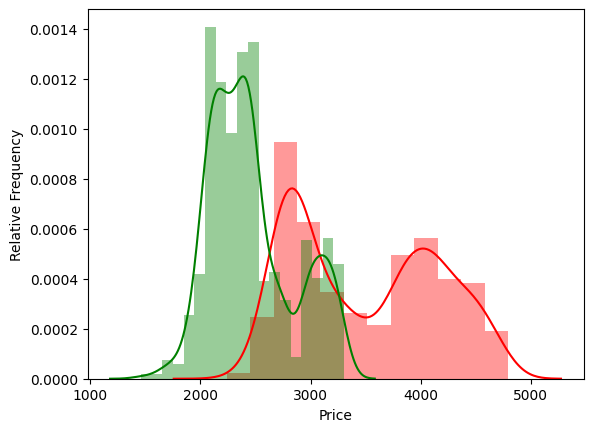

In [51]:
# Distribution

plt.rcParams['legend.fontsize'] = 15

sns.distplot(st['SP500'], label='S&P500', color='red')
sns.distplot(st['KOSPI'], label='KOSPI', color='g')
plt.xlabel('Price')
plt.ylabel('Relative Frequency')

<ipython-input-54-db9eded8fef3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['SP500'], kde = False, label='S&P500')
<ipython-input-54-db9eded8fef3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['KOSPI'], kde = False, label='KOSPI')


Text(0, 0.5, 'Frequency')

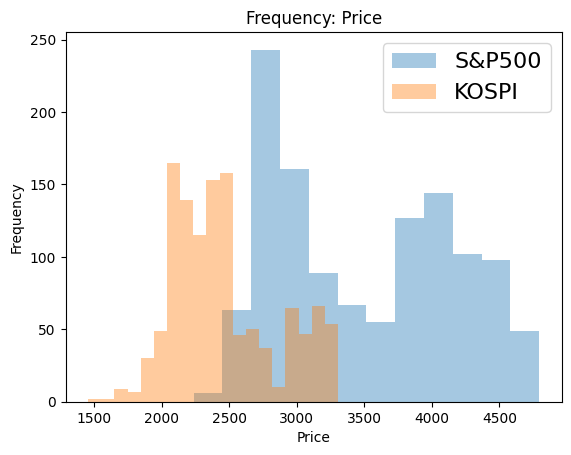

In [54]:
# Frequency

sns.distplot(st['SP500'], kde = False, label='S&P500')
sns.distplot(st['KOSPI'], kde = False, label='KOSPI')

plt.legend(prop={'size': 16})
plt.title('Frequency: Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

<ipython-input-56-0f903168bd9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['SP500'],  hist = False, kde = True, label='S&P500')
<ipython-input-56-0f903168bd9b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(st['KOSPI'],  hist = False, kde = True, label='KOSPI')


Text(0, 0.5, 'Density')

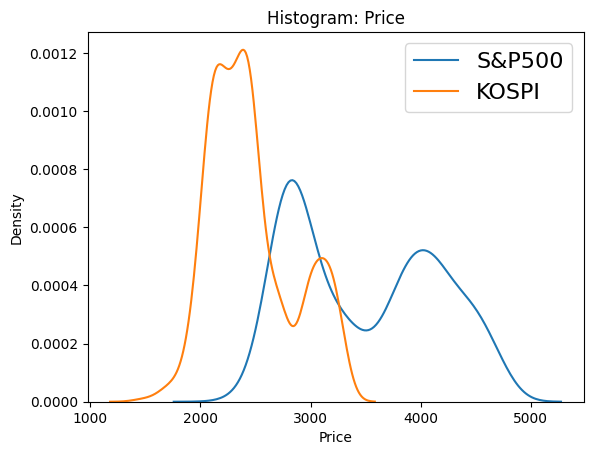

In [56]:
# Kernel Density Estimation

sns.distplot(st['SP500'],  hist = False, kde = True, label='S&P500')
sns.distplot(st['KOSPI'],  hist = False, kde = True, label='KOSPI')

# Plot Formatting
plt.legend(prop={'size':16})
plt.title('Histogram: Price')
plt.xlabel('Price')
plt.ylabel('Density')

<ipython-input-57-79729b2e8192>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rt['r_sp'], label='S&P500', color='red')
<ipython-input-57-79729b2e8192>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rt['r_kp'], label='KOSPI', color='green')


Text(0, 0.5, 'Relative Frequency')

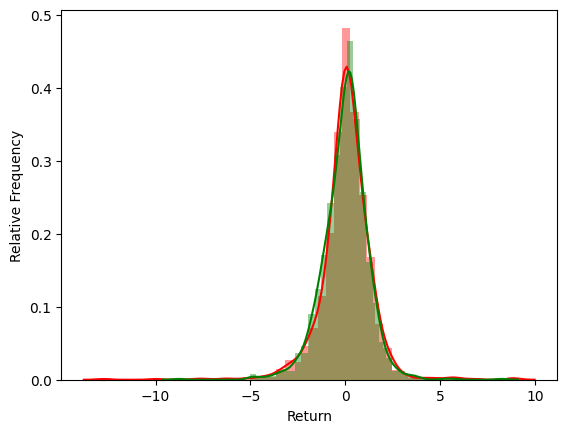

In [57]:
# Return

plt.rcParams['legend.fontsize'] = 16
rt = rt.dropna(subset=['r_sp'])

sns.distplot(rt['r_sp'], label='S&P500', color='red')
sns.distplot(rt['r_kp'], label='KOSPI', color='green')

plt.xlabel('Return')
plt.ylabel('Relative Frequency')

<ipython-input-59-159ef74aeb9f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rt['r_sp'],  hist = False, kde = True, label='S&P500')
<ipython-input-59-159ef74aeb9f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rt['r_kp'],  hist = False, kde = True, label='KOSPI')


Text(0, 0.5, 'Density')

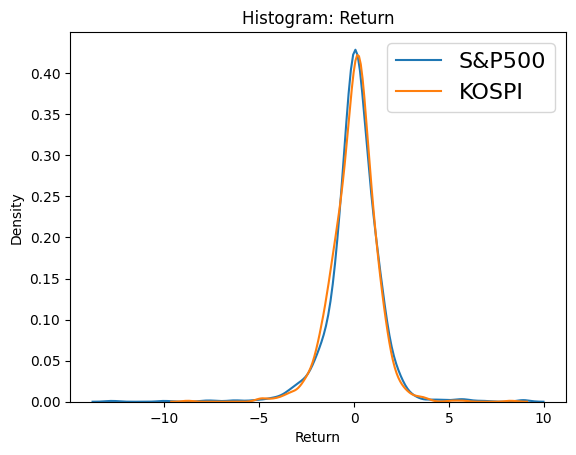

In [59]:
# Kernel Density Estimation
sns.distplot(rt['r_sp'],  hist = False, kde = True, label='S&P500')
sns.distplot(rt['r_kp'],  hist = False, kde = True, label='KOSPI')

# Plot Formatting
plt.legend(prop={'size':16})
plt.title('Histogram: Return')
plt.xlabel('Return')
plt.ylabel('Density')

In [60]:
st.corr()

,SP500,KOSPI,ss,hm,nikkei,euronext,VIX
SP500,1.000000,0.771309,0.904327,0.863378,0.920676,0.876555,0.021609
KOSPI,0.771309,1.000000,0.873683,0.885113,0.824628,0.668773,-0.185843
ss,0.904327,0.873683,1.000000,0.908856,0.896408,0.730627,0.093815
hm,0.863378,0.885113,0.908856,1.000000,0.917199,0.760855,-0.052565
nikkei,0.920676,0.824628,0.896408,0.917199,1.000000,0.869815,-0.105980
euronext,0.876555,0.668773,0.730627,0.760855,0.869815,1.000000,-0.288479
VIX,0.021609,-0.185843,0.093815,-0.052565,-0.105980,-0.288479,1.000000


In [61]:
rt.corr()

,r_sp,r_kp,r_ss,r_hm,r_nk,r_ux,r_vx
r_sp,1.000000,0.275898,0.167238,0.087343,0.243195,0.636912,-0.699257
r_kp,0.275898,1.000000,0.758798,0.573317,0.684024,0.433396,-0.158482
r_ss,0.167238,0.758798,1.000000,0.382403,0.490073,0.280951,-0.082607
r_hm,0.087343,0.573317,0.382403,1.000000,0.403901,0.221019,-0.033472
r_nk,0.243195,0.684024,0.490073,0.403901,1.000000,0.445682,-0.134373
r_ux,0.636912,0.433396,0.280951,0.221019,0.445682,1.000000,-0.481857
r_vx,-0.699257,-0.158482,-0.082607,-0.033472,-0.134373,-0.481857,1.000000


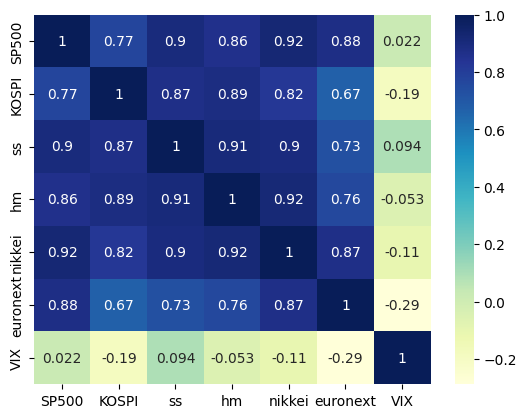

In [65]:
sns.heatmap(st.corr(), annot=True, cmap="YlGnBu")
plt.show()

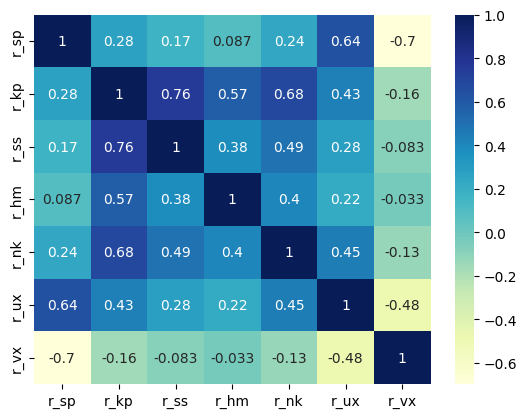

In [67]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

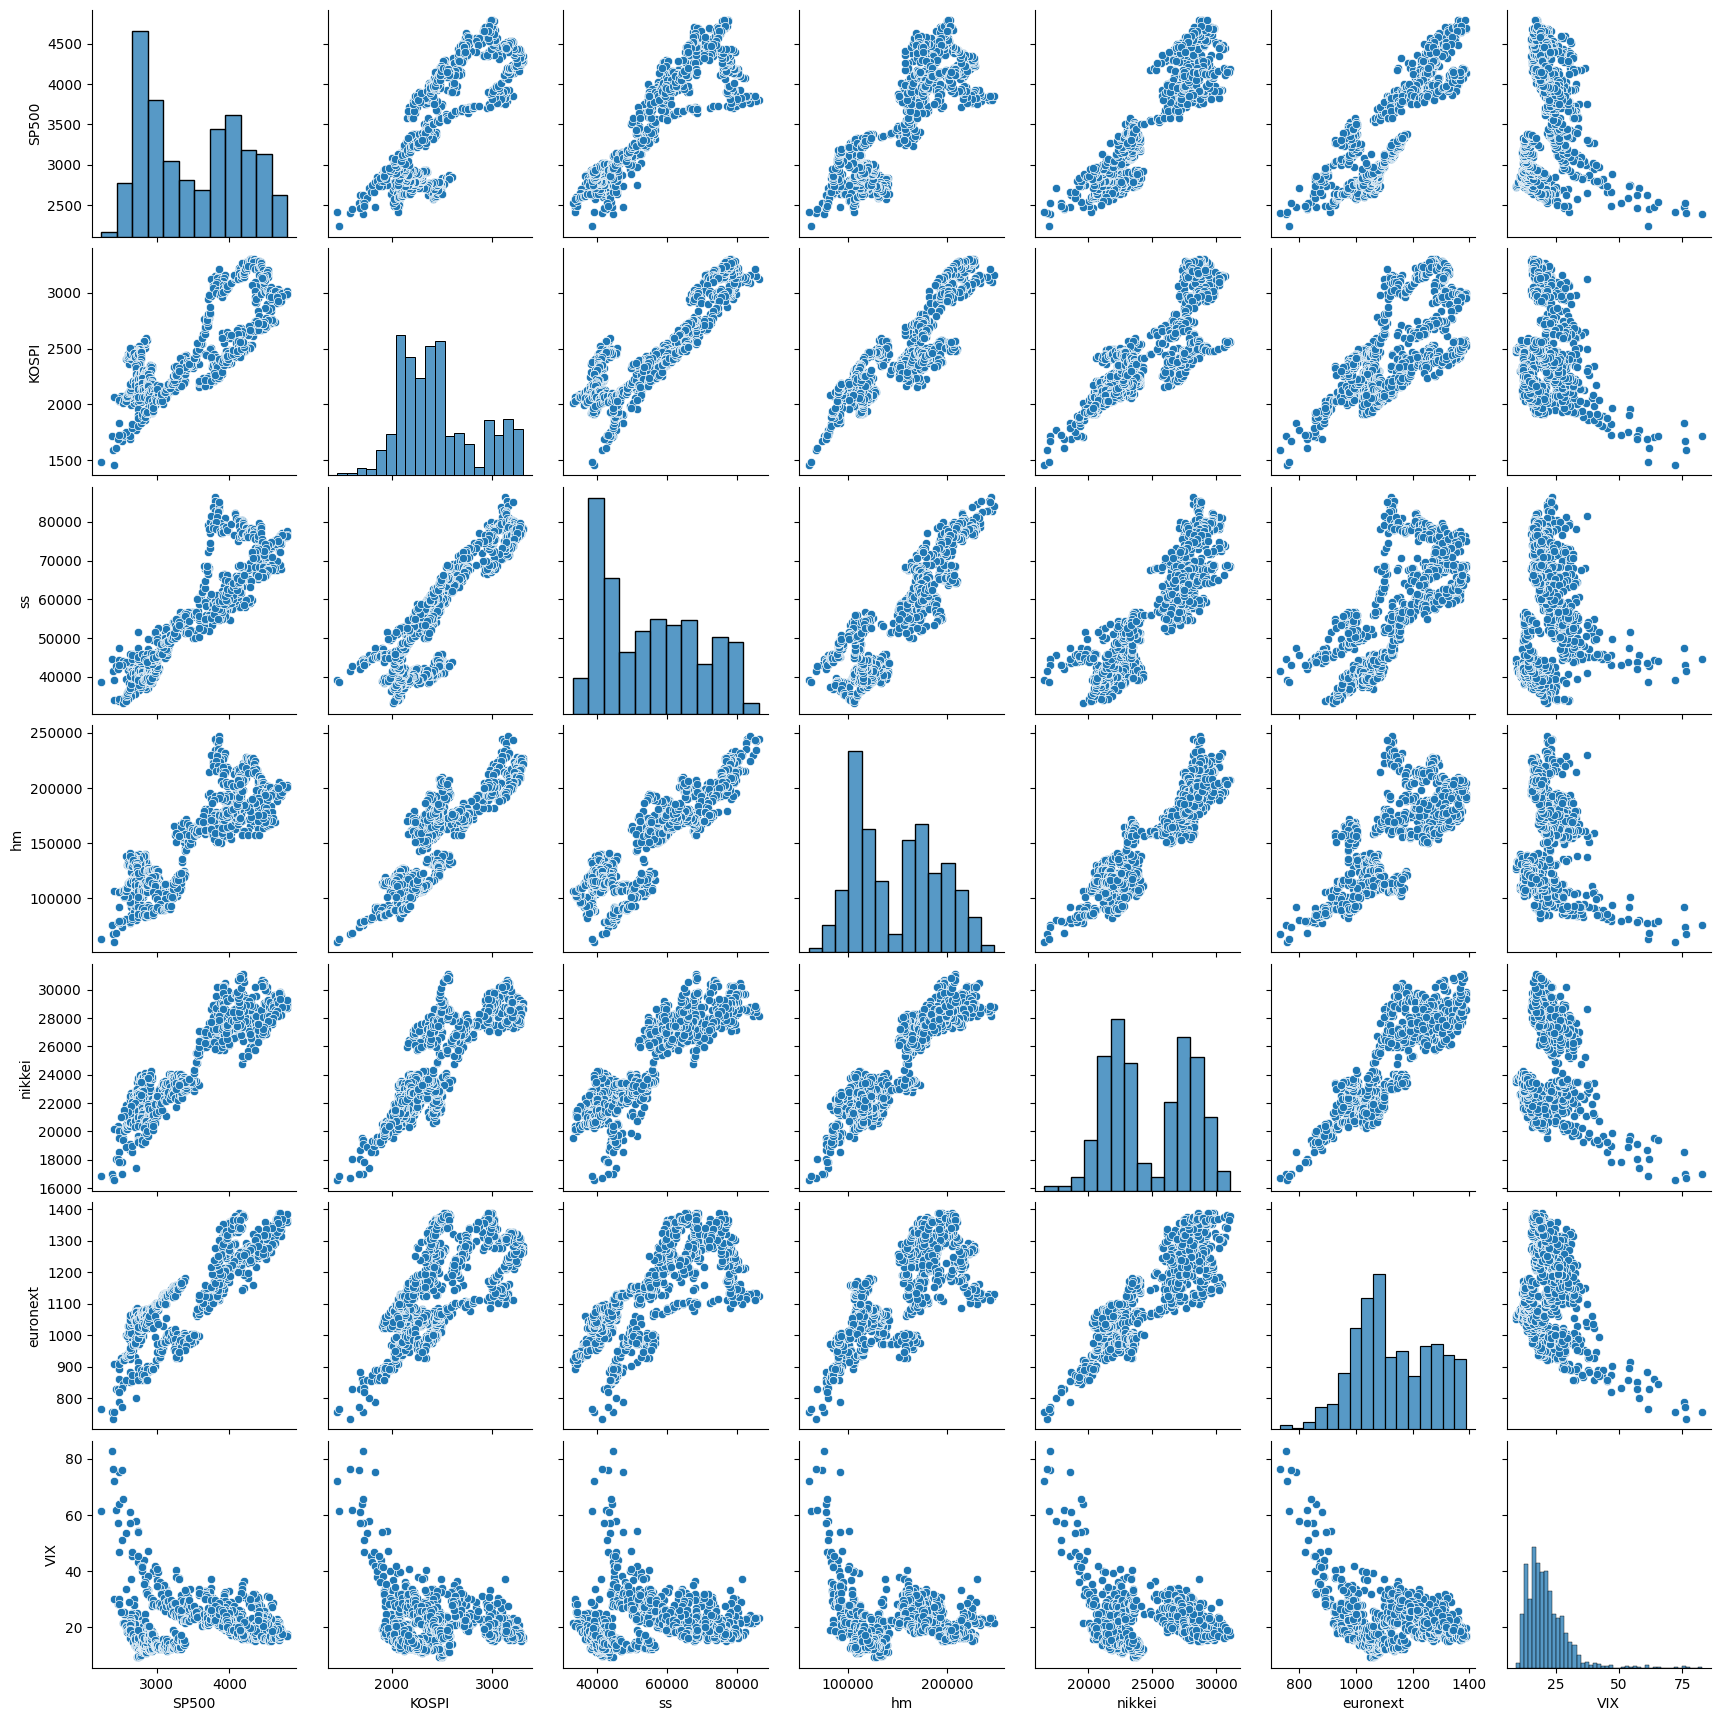

In [69]:
sns.pairplot(st)

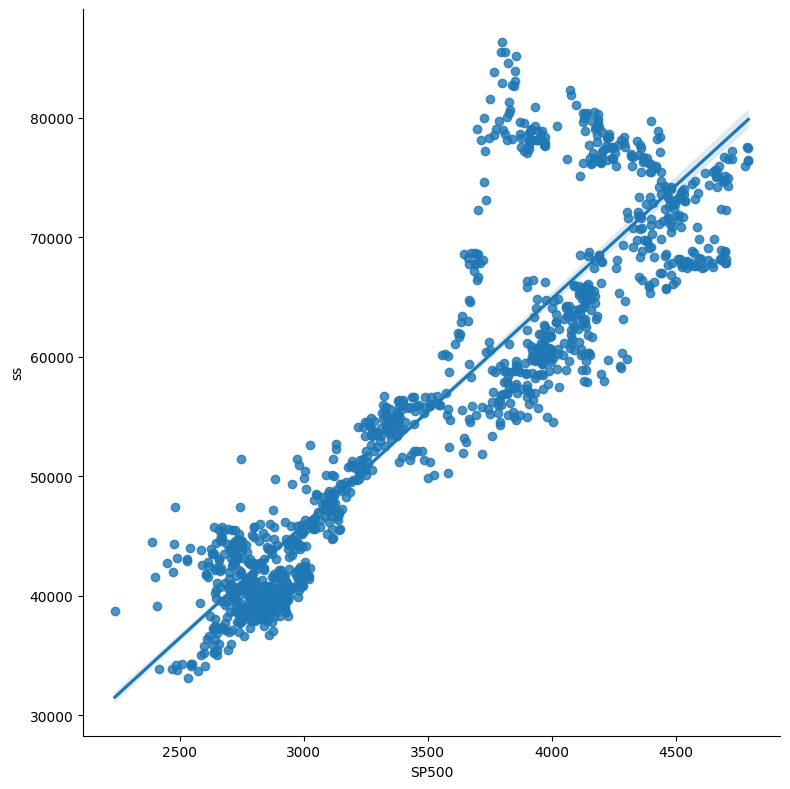

In [74]:
sns.lmplot(x="SP500", y="ss", data=st, height=8)
plt.show()

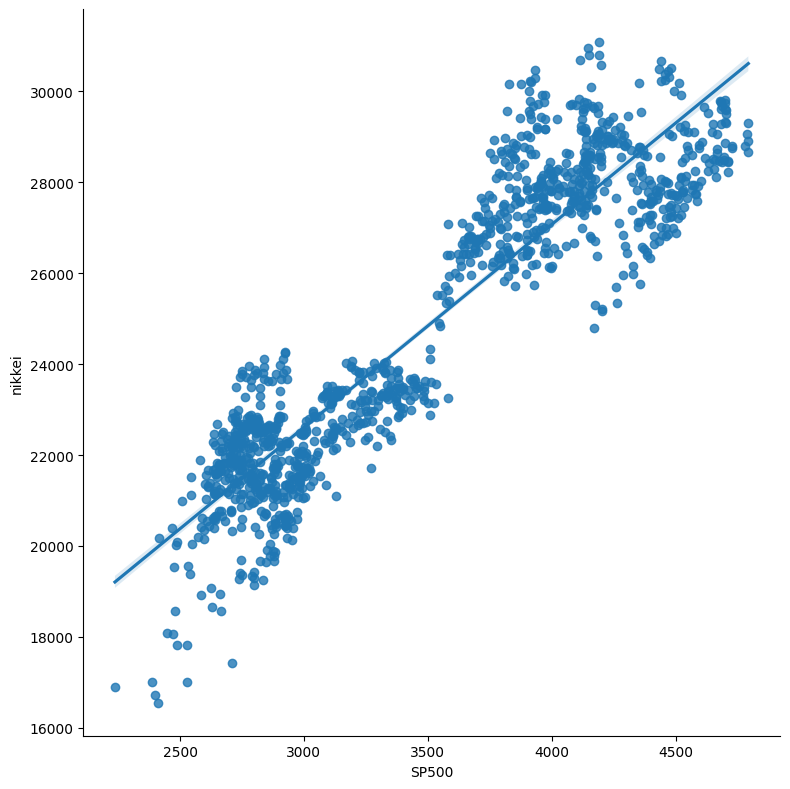

In [76]:
sns.lmplot(x="SP500", y="nikkei", height=8, data=st)
plt.show()

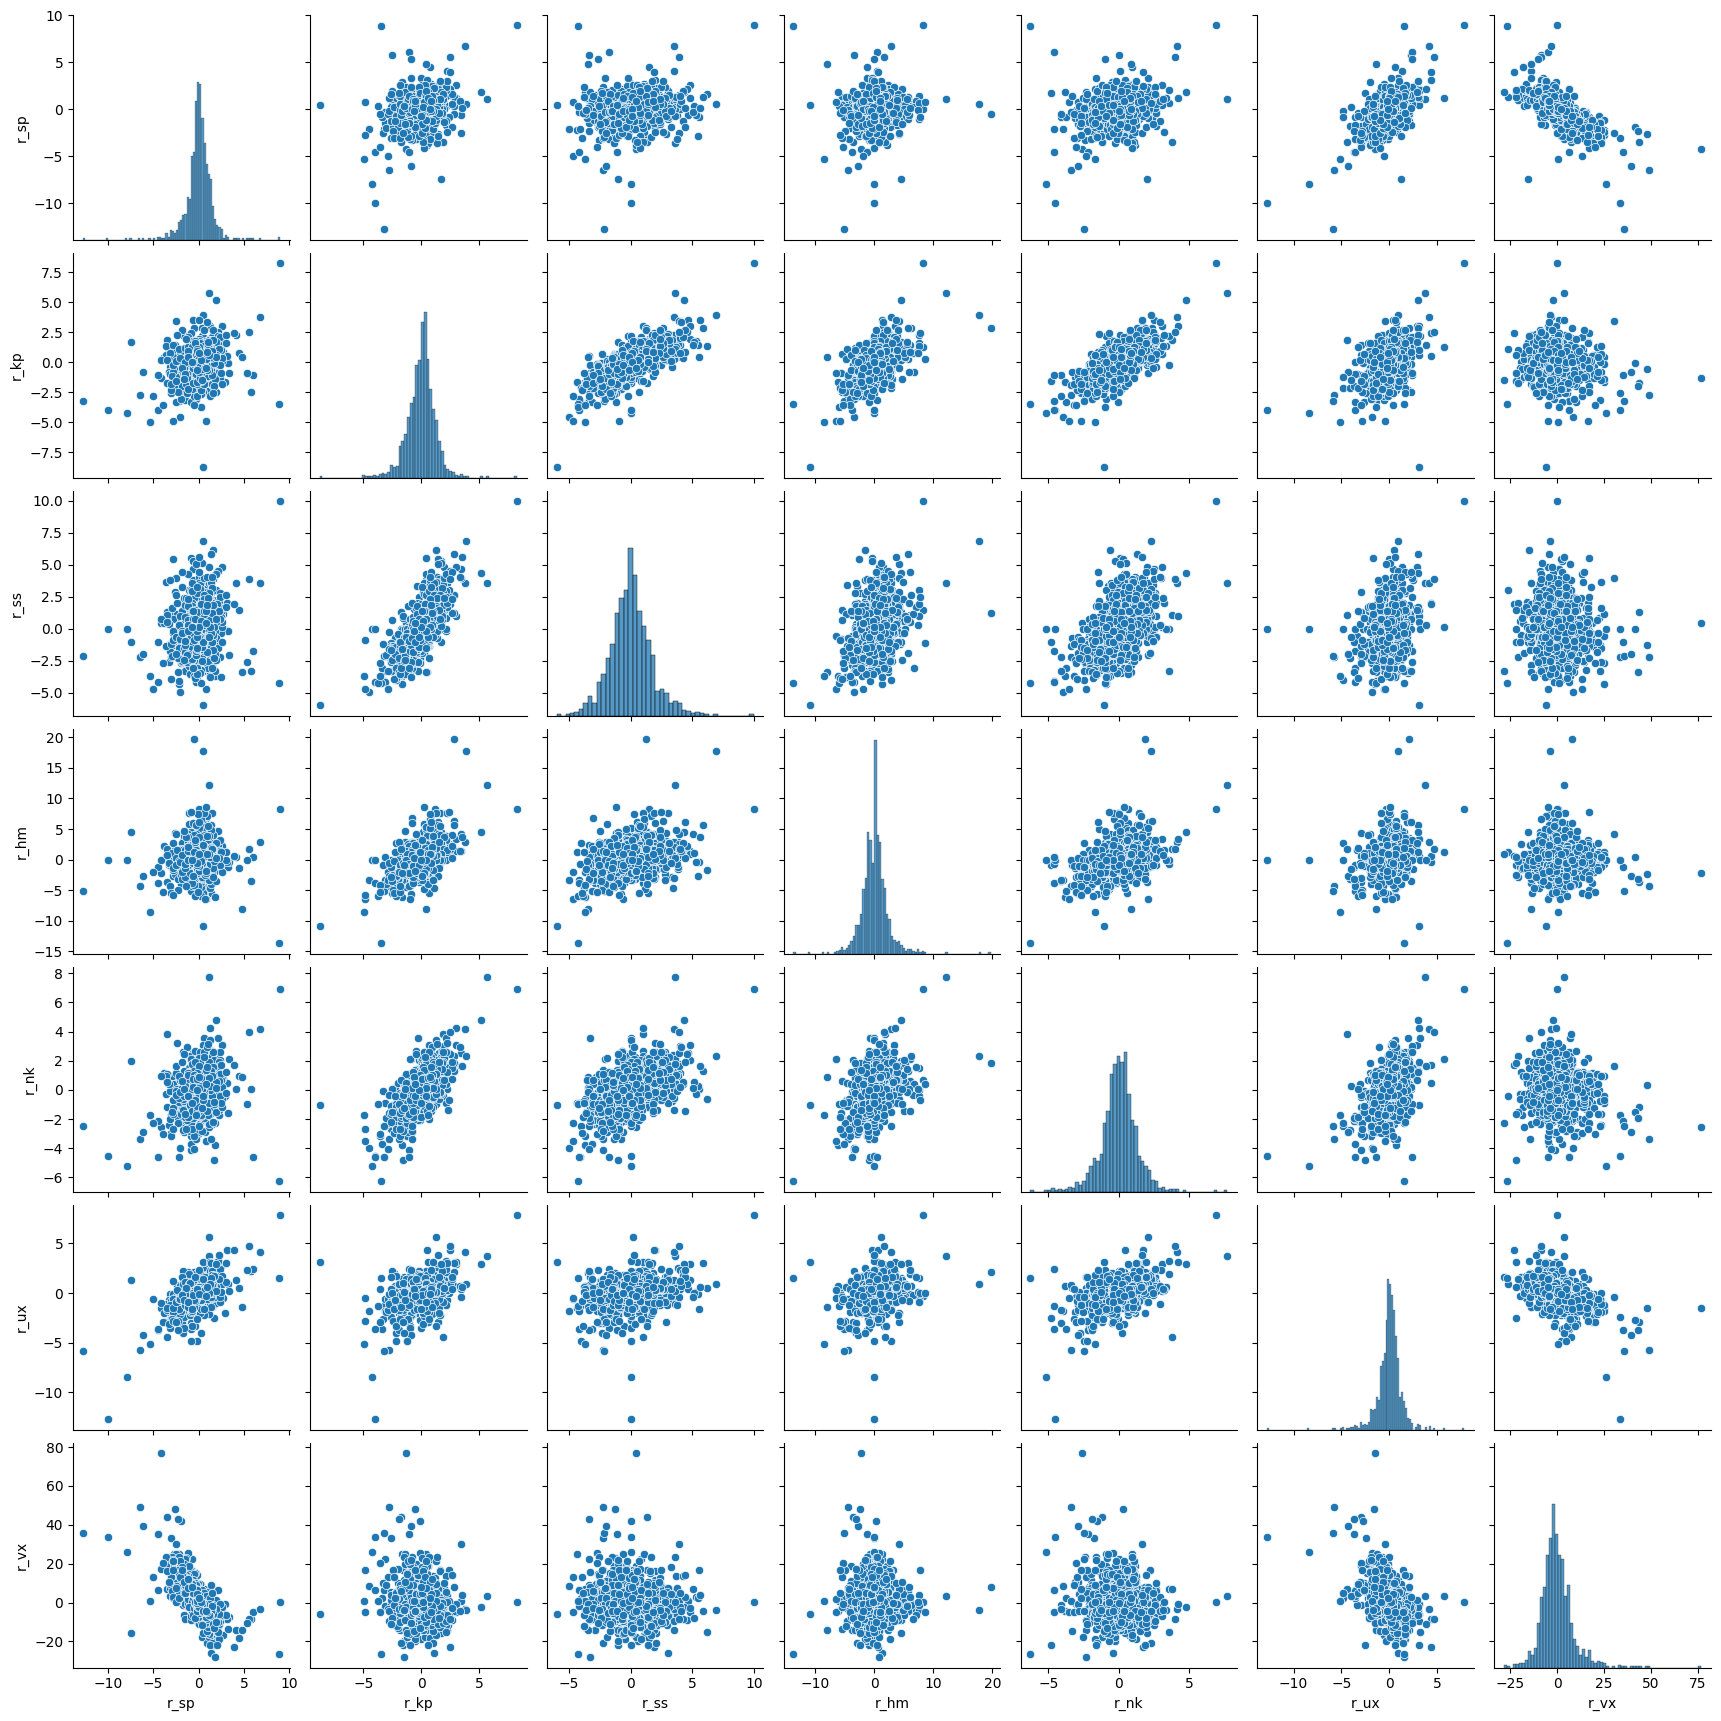

In [78]:
sns.pairplot(rt)
plt.show()